# Image similarity search

In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input

In [8]:
batch_size=2100
img_size = 299
train_path = '../data/sports/train/'
test_path = '../data/sports/test/'

In [9]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
bottleneck_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False)

Found 2100 images belonging to 3 classes.


In [10]:
images, labels  = bottleneck_generator.next()

In [11]:
images.shape

(2100, 299, 299, 3)

In [12]:
base_model = Xception(include_top=False,
                      weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      pooling='avg')

In [13]:
bottlenecks = base_model.predict(images, verbose=2)

In [14]:
bottlenecks.shape

(2100, 2048)

In [15]:
from sklearn.neighbors import DistanceMetric

In [16]:
dist = DistanceMetric.get_metric('euclidean')

In [17]:
def imshow_scaled(img):
    plt.imshow((img + 1) / 2)

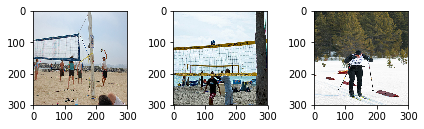

In [18]:
plt.subplot(1, 3, 1)
imshow_scaled(images[0])

plt.subplot(1, 3, 2)
imshow_scaled(images[1])

plt.subplot(1, 3, 3)
imshow_scaled(images[900])

plt.tight_layout()

In [19]:
bn_dist = dist.pairwise(bottlenecks)

In [20]:
bn_dist.shape

(2100, 2100)

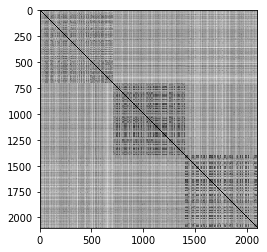

In [21]:
plt.imshow(bn_dist, cmap='gray')

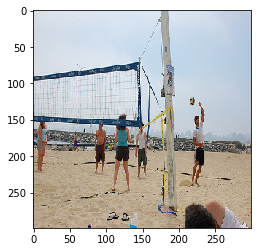

In [22]:
imshow_scaled(images[0])

In [23]:
dist_from_sel = pd.Series(bn_dist[0])

In [24]:
dist_from_sel.sort_values().head(9)

0      0.000000
431    5.348794
15     5.404699
32     5.787819
636    5.809689
648    5.847934
429    5.848355
48     5.952396
656    5.967599
dtype: float64

In [25]:
n_rows = 3
n_cols = 3
n_images = n_rows * n_cols

In [26]:
retrieved = dist_from_sel.sort_values().head(n_images)

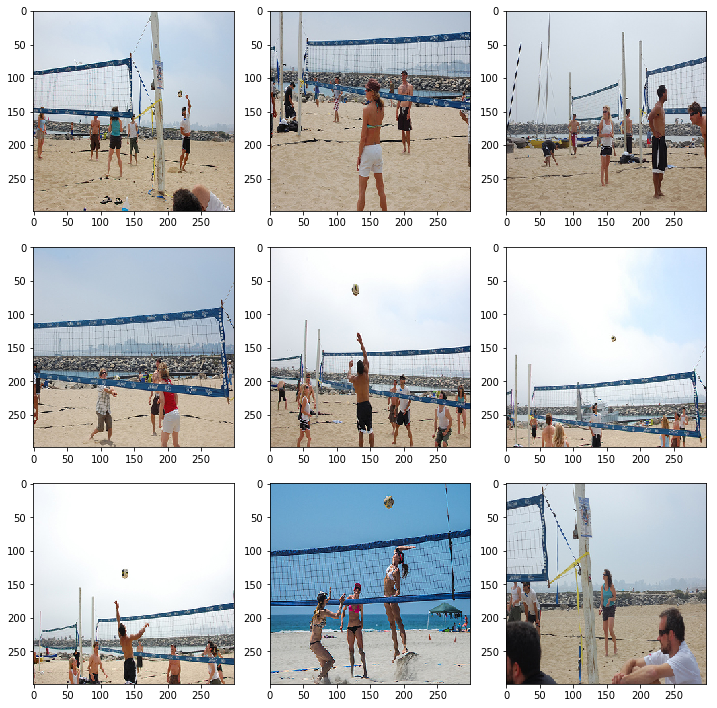

In [27]:
plt.figure(figsize=(10, 10))
i = 1
for idx in retrieved.index:
    plt.subplot(n_rows, n_cols, i)
    imshow_scaled(images[idx])
    i += 1
plt.tight_layout()

## Exercise

Define a function `image_search` that encapsulates the code above and retrieves and plot the top 8 images closest to a given image index:

```python
def image_search(img_index, n_rows=3, n_columns=3):
    ....your code here...
```

In [50]:
def image_search(img_index, n_rows=3, n_columns=3):
    dist_from_sel = pd.Series(bn_dist[img_index])
    n_images = n_rows * n_cols
    retrieved = dist_from_sel.sort_values().head(n_images)
    plt.figure(figsize=(4, 4))
    imshow_scaled(images[img_index])
    plt.figure(figsize=(10, 10))
    i = 1
    for idx in retrieved.index:
        plt.subplot(n_rows, n_cols, i)
        imshow_scaled(images[idx])
        i += 1
    plt.tight_layout()

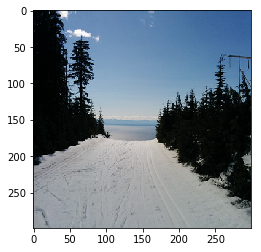

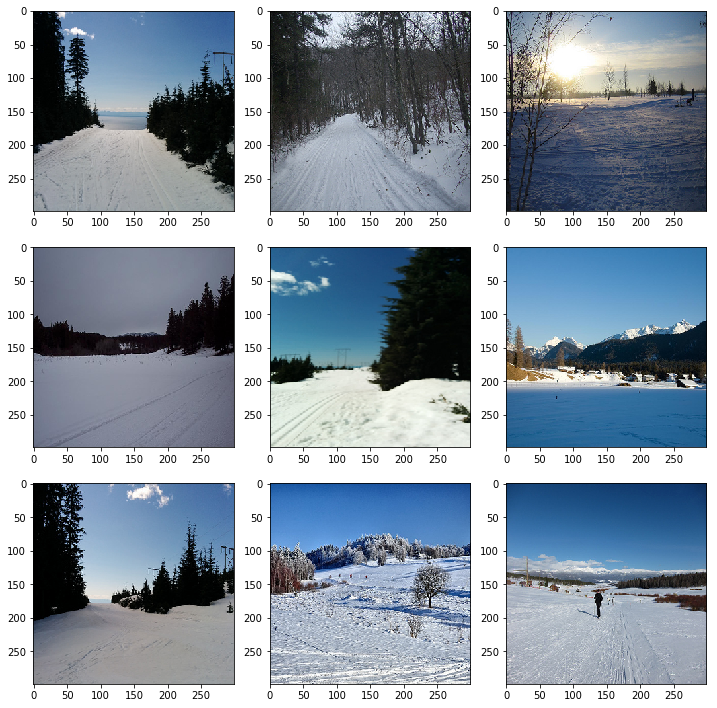

In [51]:
image_search(1000)

# The original image is included in the result (with distance = 0)